# Checkpoint 4: Simple Monte Carlo Generation of Pseudo Experiments ("toys")

In [84]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Define our experiments
tau = 2.2 # true lifetime in microseconds
max_t = 10.0 # exclude decay times beyond max_t
num_decays = 1000 # per experiment
num_experiments = 500

In [86]:
def calc_exp_prob_density(x, tau):
    # calculate the probability density from exponential distribution for a given decay time
    sig = 0.5
    tau2 = 4.0
    G = tau/10.0
    X1 = 0.5
    X2 = 0.9
    p1 = (1.0/tau)*np.exp(-(x/tau))
    p2 = X1*(1/(sig*(2*np.pi)**0.5))*np.exp(-0.5*(x/sig)**2) + (1-X1)*(1.0/tau2)*np.exp(-(x/tau2))
    a = 1 - np.exp(-x/G)
    return (X2*p1 + (1-X2)*p2)*a

In [87]:
def plot_exp_hist(tau, max_t, data):
    # plot a histogram of decay times for a single experiment
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(data,
            bins=50,
            density=True,
            label='Experiment lifetimes')
    x = np.linspace(0, max_t, 1000)
    # plot true exponential pdf on top to check our histogram agrees
    ax.plot(x,
            calc_exp_prob_density(x, tau),
            'r-',
            label='True pdf')
    # draw legend
    ax.legend(loc='upper right')
    ax.set_xlabel('decay time / microsecond')
    ax.set_ylabel('probability density')
    plt.show()

In [88]:
def calc_single_lifetime(tau, max_t, num_decays, plotted):
    # returns the lifetime estimate for a single experiment from 1000 decays
    lifetimes = []
    sig = 0.5
    tau2 = 4.0
    G = tau/10.0
    X1 = 0.5
    X2 = 0.9
    while len(lifetimes) < num_decays:
        p1 = np.random.exponential(tau)
        p2 = X1*np.random.normal(0, sig) + (1-X1)*np.random.exponential(tau2)
        a = 1 - G*np.random.exponential(G)
        lifetime = (X2*p1 + (1-X2)*p2)*a
        # filter out decay times less than defined maximum threshold
        if lifetime < max_t:
            lifetimes.append(lifetime)
    lifetimes = np.array(lifetimes)
    # histogram may be plotted
    if not plotted:
        plot_exp_hist(tau, max_t, lifetimes)
    # special feature of exponentially distributed measurements, final estimate is average of recorded decay times
    tau_estimate = np.mean(lifetimes)
    return tau_estimate

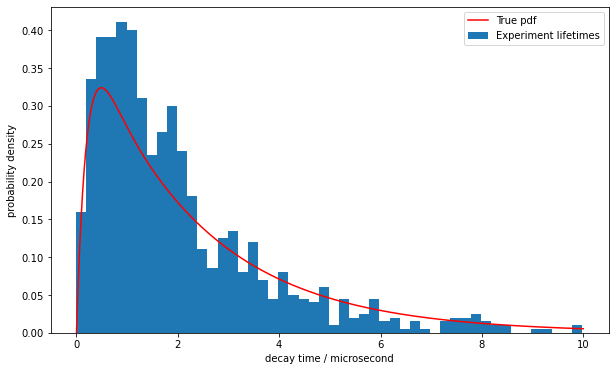

In [89]:
# Plot a histogram for first experiment
plotted = False
full_results = []
for i in range(num_experiments):
    full_results.append(calc_single_lifetime(tau, max_t, num_decays, plotted))
    # Once the data from first experiment is plotted, don't need to plot more
    plotted = True

The histogram shape roughly matches that of the underlying exponential probability density function as expected.

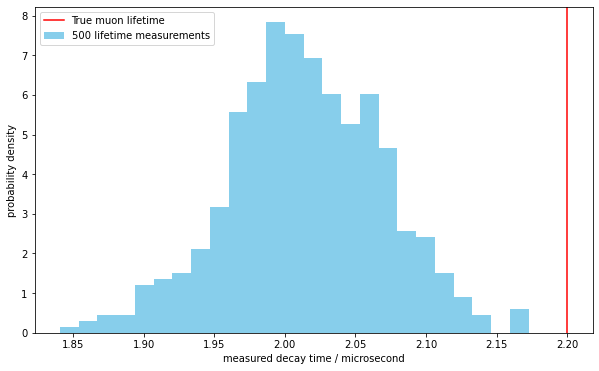

In [90]:
# Plot histogram of estimates from all repeated experiments
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(full_results,
        color = "skyblue",
        bins=25,
        density=True,
        label='{} lifetime measurements'.format(num_experiments))
# Draw on line for true muon lifetime
ax.axvline(x=tau, color='r', label='True muon lifetime')
# Draw legend
ax.legend(loc='upper left')
ax.set_xlabel('measured decay time / microsecond')
ax.set_ylabel('probability density')
plt.show()

The histogram of the set of 500 repeated experiments looks roughly like a gaussian distribution so assuming gaussian error is reasonable

In [91]:
# Statistics on full results
# mean
measured_mean = np.mean(full_results)
# standard deviation
measured_st_dev = np.std(full_results)
# standard error on the mean
measured_st_error_mean = measured_st_dev / (num_experiments)**0.5
# bias
bias = abs(tau - measured_mean)

In [92]:
print('The error on a measurement from a single experiment is the standard deviation of the above distribution: ', measured_st_dev)
print('The bias is the difference between the measured mean over the 500 repeats and the true value of tau: ', bias)
print('The error on the bias is the same as the standard error on the measured mean: ', measured_st_error_mean)

The error on a measurement from a single experiment is the standard deviation of the above distribution:  0.05489883366151189
The bias is the difference between the measured mean over the 500 repeats and the true value of tau:  0.1855241334038067
The error on the bias is the same as the standard error on the measured mean:  0.002455150479051885


There is clearly bias as we cas see the mean of our measurements differs from the true lifetime. Our mean is lower because we truncated our measured decay times at the high end by only recording decays less than 10 microseconds. This means each experiment reports a decay time biased to be lower than it should be.